## Ineference and Train Notebook
    1. inference
    2. train

In [1]:
import matplotlib.pyplot as plt
import torch
import cv2

from models.attn_unet import *
from finance_dataset import FinaceDataset


data load.
len : 546


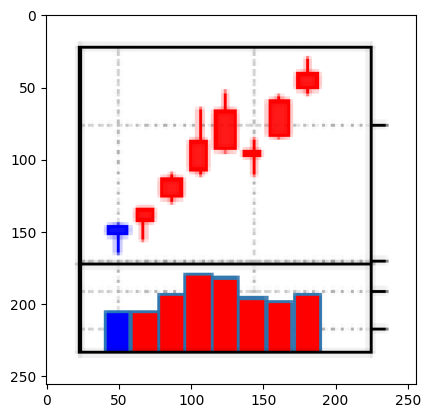

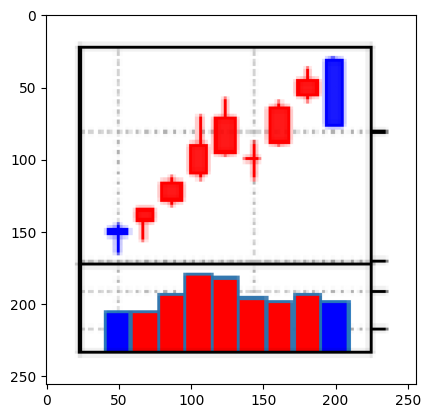

In [303]:
test_dataset = FinaceDataset(csv_path='/workspace/fi_homework/data/splits/test.csv',
                                                mode='last',
                                                train=False,
                                                all_mask=True
                                                    )
idx= 48
sample = test_dataset.__getitem__(idx)
img = sample['image']
plt.imshow(img.permute(1,2,0).numpy())
plt.show()
img = sample['target_image']
plt.imshow(img.permute(1,2,0).numpy())
plt.show()

### 1. Inference

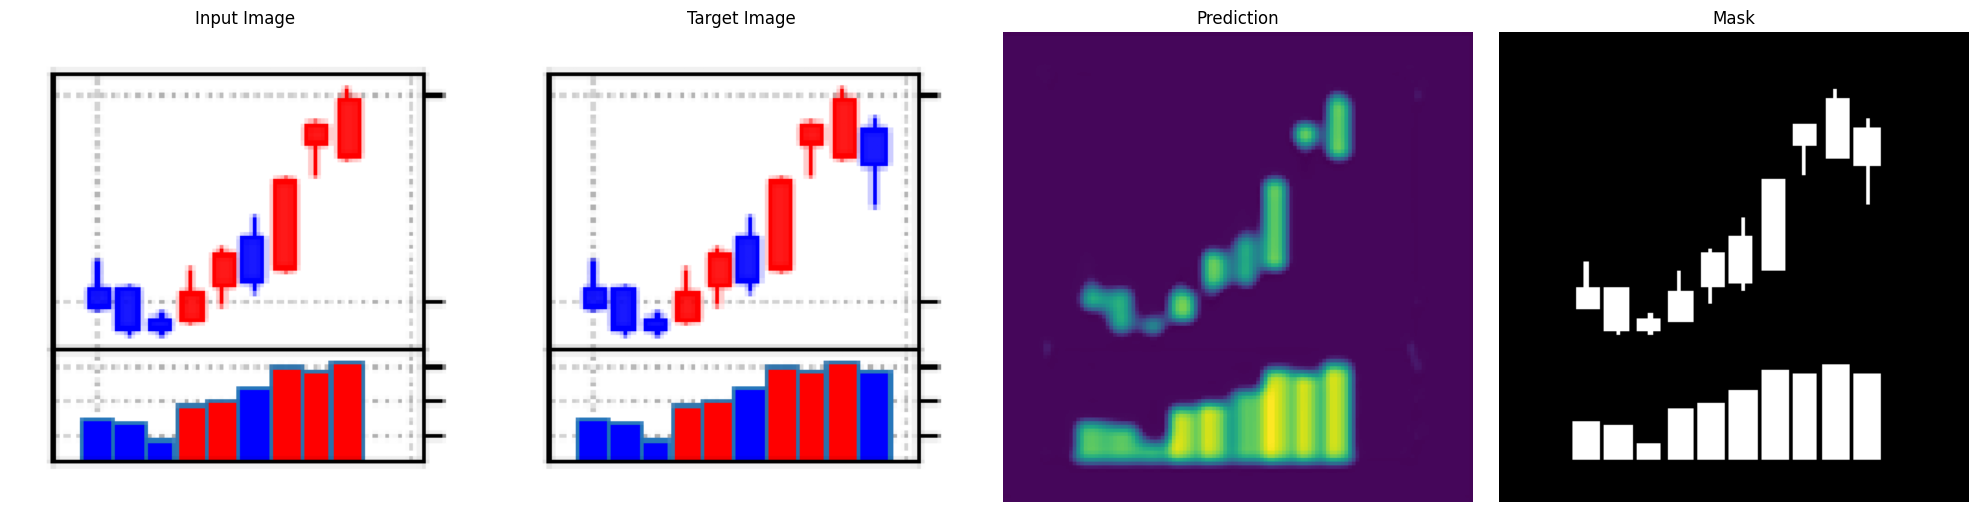

In [261]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def evaluate_and_visualize(model, sample, checkpoint_path, idx=1):
    model.eval()
    model.load_state_dict(torch.load(checkpoint_path, map_location='cpu')['net'])
    
    image = sample['image'].unsqueeze(0)  
    with torch.no_grad():
        outs = model(image)
        out = outs[idx].detach().cpu()
        
    if idx:
        out = torch.sigmoid(out)
    
    # Visualization
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    # Input image visualization
    input_image = sample['image'].permute(1, 2, 0).cpu().numpy()
    axes[0].imshow(input_image)
    axes[0].set_title('Input Image')
    axes[0].axis('off')
    
    # Target visualization
    target_image = sample['target_image'].permute(1, 2, 0).cpu().numpy()
    axes[1].imshow(target_image)
    axes[1].set_title('Target Image')
    axes[1].axis('off')
    
    # Prediction visualization
    prediction = out[0].permute(1, 2, 0).numpy()
    prediction = np.maximum(prediction,0)
    axes[2].imshow(prediction, cmap='viridis')
    axes[2].set_title('Prediction')
    axes[2].axis('off')
    
    # Target mask visualization
    mask = sample['mask'][0].cpu().numpy()
    axes[3].imshow(mask, cmap='gray')
    axes[3].set_title('Mask')
    axes[3].axis('off')
    
    # Colorbar for prediction
    # cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=axes[2], orientation='vertical')
    # cbar.set_label('Prediction Intensity')
    
    plt.tight_layout()
    plt.show()


# checkpoint_path='/workspace/fi_homework/checkpoint/ssim/sig_mask_sum_dice_10/0_226_0.0525.pth'
# checkpoint_path ='/workspace/fi_homework/checkpoint/ssim/maby_good_dice/0_34_0.2028.pth'
# checkpoint_path='/workspace/fi_homework/checkpoint/ssim/maby_good_dice_191/0_11_0.2148.pth'
# checkpoint_path='/workspace/fi_homework/checkpoint/ssim/191_mae/0_87_0.1992.pth'
# checkpoint_path = '/workspace/fi_homework/checkpoint/ms_ssim/hflip/0_219_0.6439.pth'
# checkpoint_path = '/workspace/fi_homework/checkpoint/ssim/191_last/0_6_0.2133.pth'
# checkpoint_path = '/workspace/fi_homework/checkpoint/ssim/191_last/b1/0_27_0.1978.pth'
# checkpoint_path = '/workspace/fi_homework/checkpoint/ssim/191_last/b32/0_22_0.2141.pth'
# checkpoint_path = '/workspace/fi_homework/checkpoint/ssim/175_191_mask/b32/0_7_0.2107.pth'
# checkpoint_path='/workspace/fi_homework/checkpoint/attnv2/ssim/random/0_46_1.2989.pth'
checkpoint_path = '/workspace/fi_homework/checkpoint/ssim/175_191_mask/b16/0_51_0.2011.pth'

idx= 177
sample = test_dataset.__getitem__(idx)
model = get_model(3,3,'dropblock',0.2,act=None,v='attnv2')
evaluate_and_visualize(model, sample, checkpoint_path, idx=1)


### V3

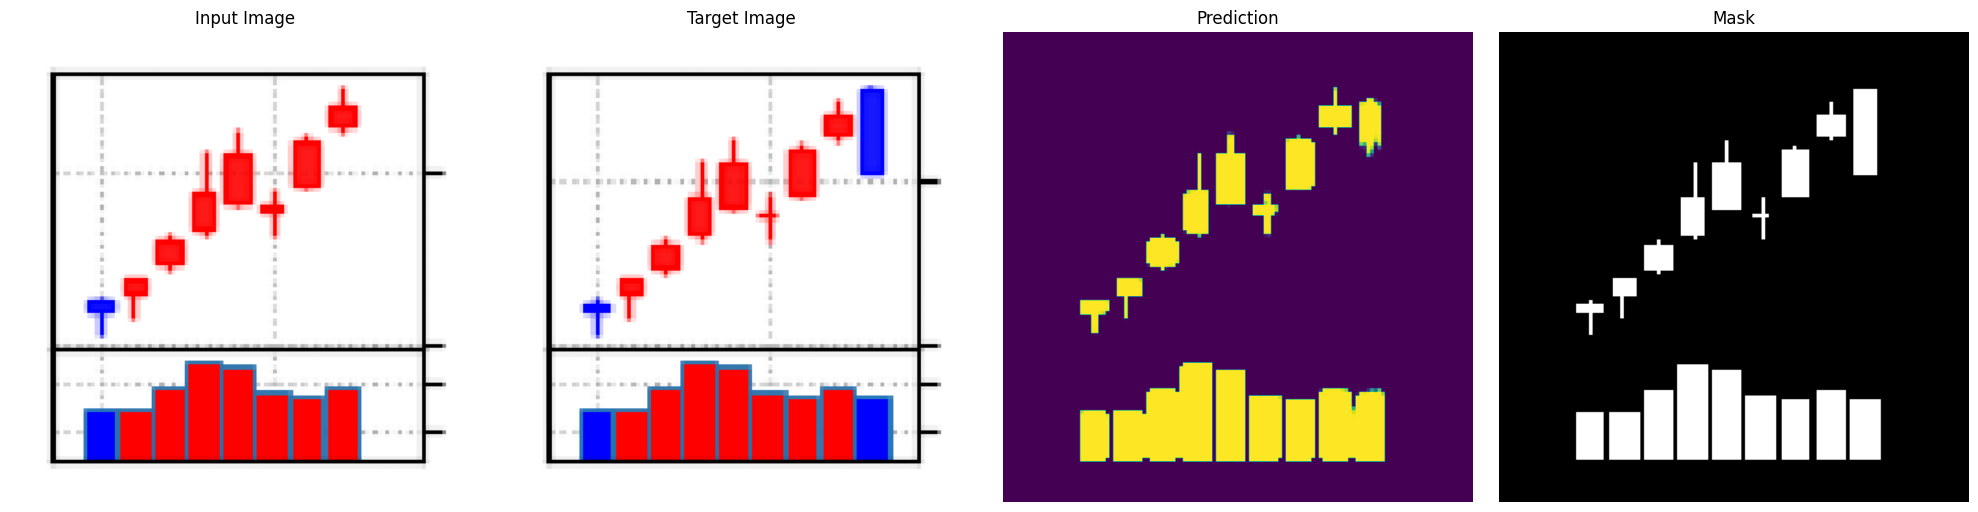

In [304]:
checkpoint_path = '/workspace/fi_homework/checkpoint/attnv3/ssim/all_mask/0_230_0.8458.pth'

idx= 48
sample = test_dataset.__getitem__(idx)
model = get_model(3,3,'dropblock',0.2,act=None,v='attnv3')
evaluate_and_visualize(model, sample, checkpoint_path, idx=1)


### V4

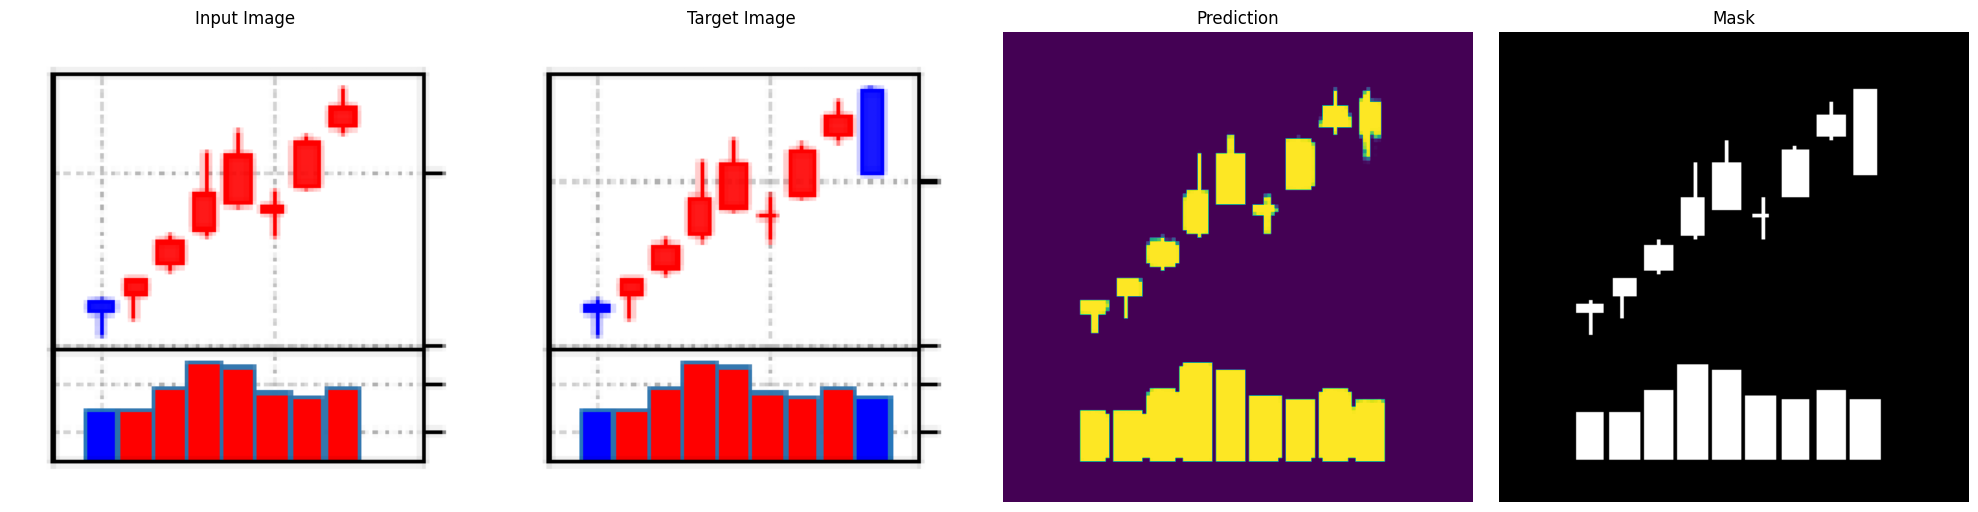

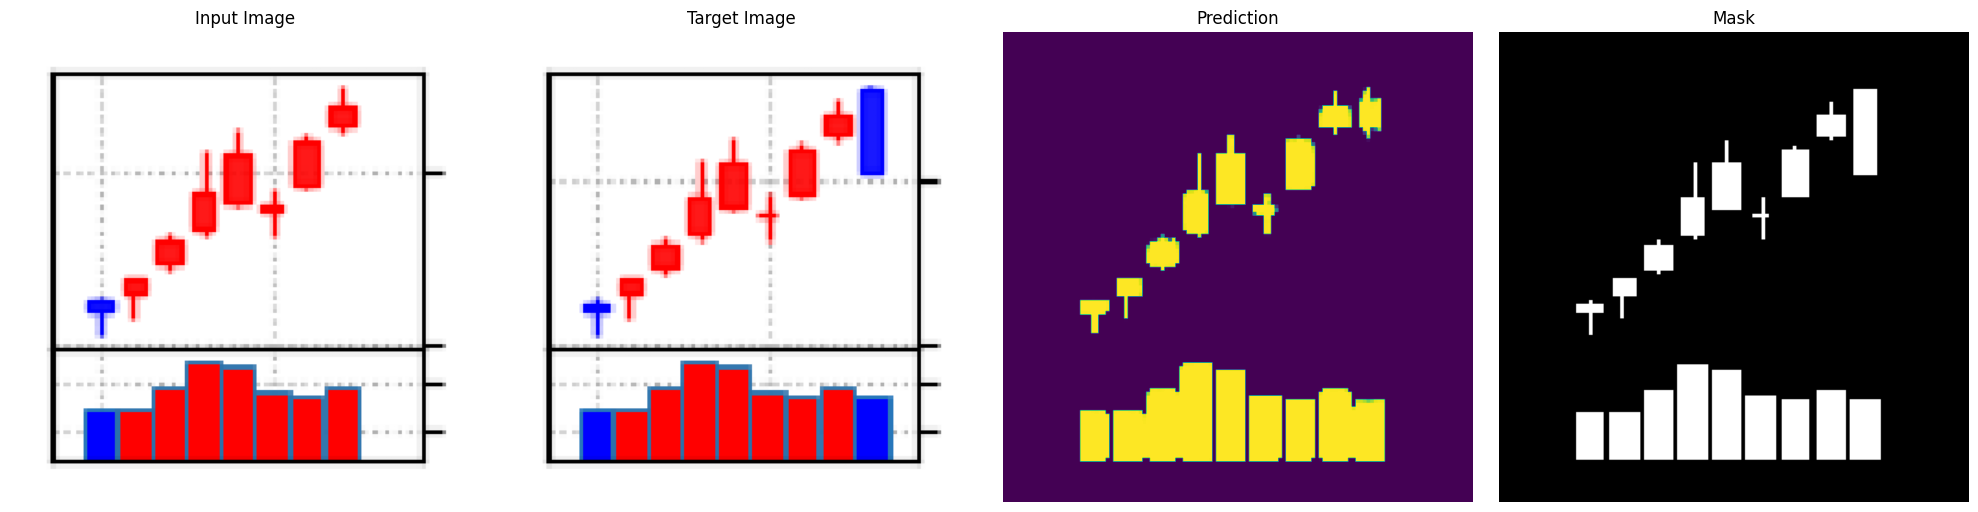

In [305]:
checkpoint_path = 'checkpoint/attnv4/ssim/all_mask/0_395_0.8637.pth'
checkpoint_path_2 ='checkpoint/attnv4/ssim/all_mask/0_1_gpus/0_743_0.8655.pth'
# 113 320 92 60 79 379 71 56
idx= 48
sample = test_dataset.__getitem__(idx)
model = get_model(3,3,'dropblock',0.2,act=None,v='attnv4')
evaluate_and_visualize(model, sample, checkpoint_path, idx=1)
evaluate_and_visualize(model, sample, checkpoint_path_2, idx=1)


### pre-train and fine

fine-tuned on last mode


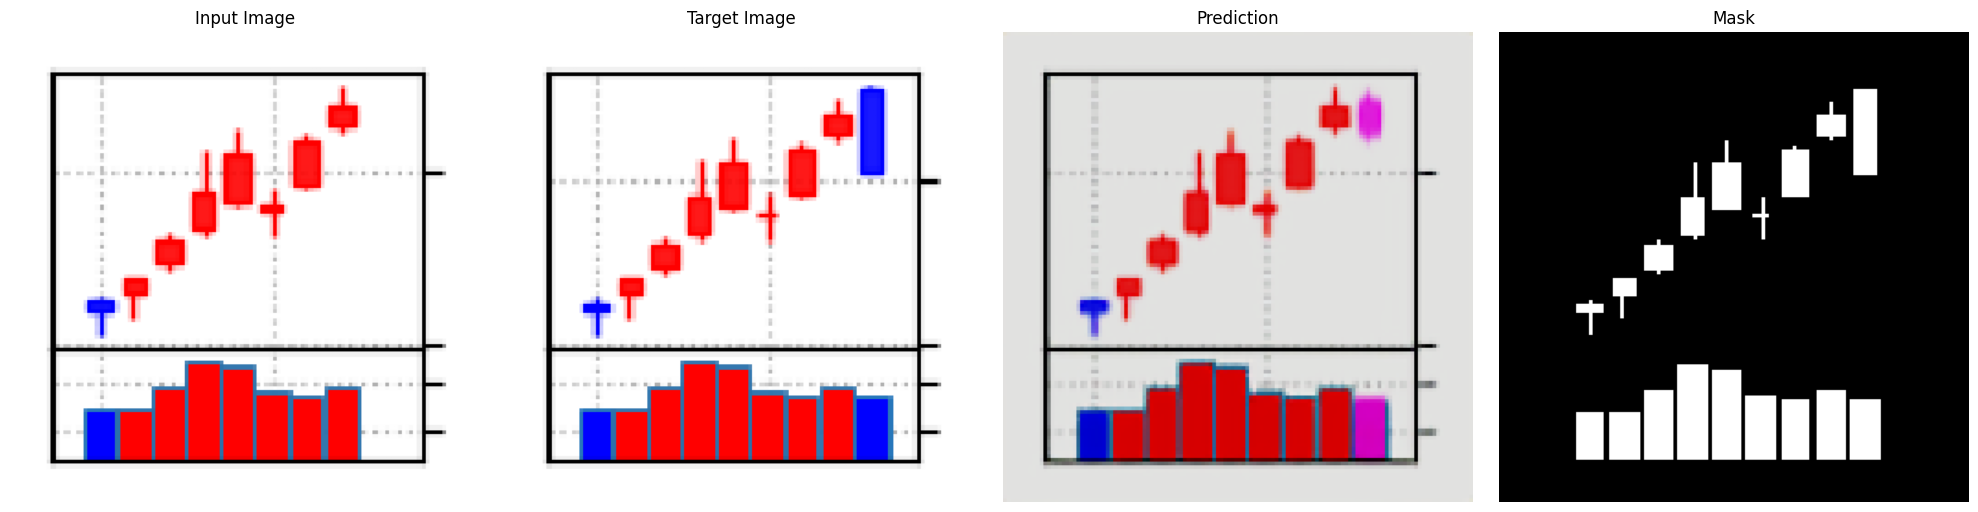

In [312]:
# pre
checkpoint_path_pre = '/workspace/fi_homework/checkpoint/attnv4/ssim/all_mask_ramdom_pre/0_473_0.8451.pth'
# fine
checkpoint_path = '/workspace/fi_homework/attnv4/ssim/all_mask_ramdom_pre/finetune/ssim/all_mask_ramdom_pre/0_269_0.8376.pth'
# 113 320 92 60 71 56 58
idx= 48
sample = test_dataset.__getitem__(idx)
model = get_model(3,3,'dropblock',0.2,act=None,v='attnv4')
# print('pre-trained on random mode')
# evaluate_and_visualize(model, sample, checkpoint_path_pre, idx=1)
print('fine-tuned on last mode')
evaluate_and_visualize(model, sample, checkpoint_path, idx=0)


### 2. Train model

In [308]:
!sh train.sh

2024-11-22 19:10:42.938401: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
val_ssim mode : 
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: logs/attnv4/ssim/test/repeat_0
data load.
len : 3575
data load.
len : 1028
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type       | Params
-----------------------------------------
0 | model     | AttnUnetV4 | 8.2 M 
1 | criterion | CombLossFn | 0     
2 | metrics   | ValMetric  | 0     
-----------------------------------------
8.2 M     Trainable params
0         Non-trainable params
8.2 M     Total params
32.923    Total estimated model params size (MB)
Sanity Checking DataLoader 0:   0%|                       | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:76: UserWarning: Trying to infer the `batch_size` fr